In [7]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

# Load the datasets
train_data = pd.read_csv('../project2/movie_data_train.csv')
test_data = pd.read_csv('../project2/movie_data_test.csv')

# Define the median revenue to split data into 'high' and 'low'
median_revenue = train_data['revenue'].median()
train_data['revenue_category'] = np.where(train_data['revenue'] >= median_revenue, 'high', 'low')
test_data['revenue_category'] = np.where(test_data['revenue'] >= median_revenue, 'high', 'low')

# Drop the specified columns, including 'revenue' since we now have 'revenue_category'
columns_to_drop = ['vote_average','popularity', 'profit', 'roi', 'revenue']
X_train = train_data.drop(columns=columns_to_drop + ['revenue_category'])
y_train = train_data['revenue_category']
X_test = test_data.drop(columns=columns_to_drop + ['revenue_category'])
y_test = test_data['revenue_category']

# Initialize and train the Random Forest model
rf_model = RandomForestClassifier(random_state=42, n_estimators=100)
rf_model.fit(X_train, y_train)

# Predict on the test set
y_pred = rf_model.predict(X_test)

# Generate and print the classification report
report = classification_report(y_test, y_pred)
print(report)


              precision    recall  f1-score   support

        high       0.75      0.74      0.75       601
         low       0.71      0.72      0.72       530

    accuracy                           0.73      1131
   macro avg       0.73      0.73      0.73      1131
weighted avg       0.73      0.73      0.73      1131



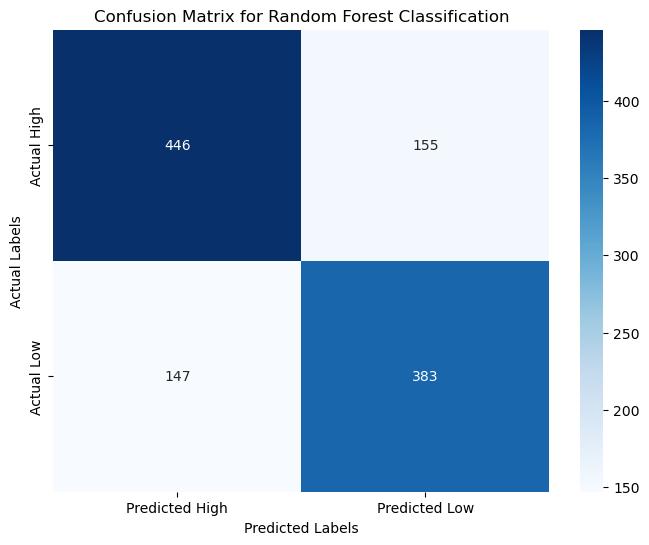

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Generate the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred, labels=['high', 'low'])

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Predicted High', 'Predicted Low'], 
            yticklabels=['Actual High', 'Actual Low'])
plt.title("Confusion Matrix for Random Forest Classification")
plt.xlabel("Predicted Labels")
plt.ylabel("Actual Labels")
plt.show()
